<a href="https://colab.research.google.com/github/Urmilakoli/big-data-product-rating-prediction/blob/main/UrmilaKoli_LGG_MRI_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fig1: Example MRI image and mask pair from dataset

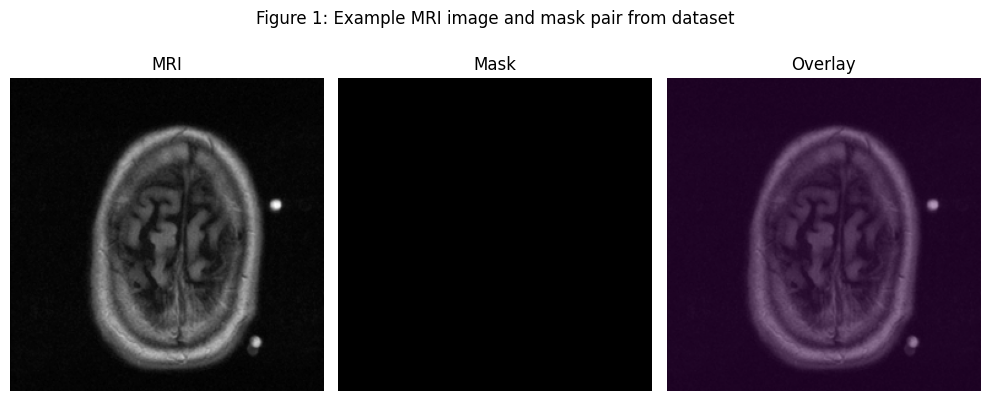

Saved: figure_01_example_mri_mask.png


In [44]:
import numpy as np
import matplotlib.pyplot as plt

assert 'X' in globals() and 'y' in globals() and len(X)>0, \
    "Run your loader first so X and y exist."

i = np.random.randint(len(X))  # pick a sample
img = X[i].squeeze()
msk = y[i].squeeze()

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(img, cmap='gray');  axes[0].set_title('MRI');   axes[0].axis('off')
axes[1].imshow(msk, cmap='gray');  axes[1].set_title('Mask');  axes[1].axis('off')
axes[2].imshow(img, cmap='gray');  axes[2].imshow(msk, alpha=0.4); axes[2].set_title('Overlay'); axes[2].axis('off')

fig.suptitle('Figure 1: Example MRI image and mask pair from dataset', y=1.02)
plt.tight_layout()
plt.savefig('figure_01_example_mri_mask.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: figure_01_example_mri_mask.png")


Figure 2: Screenshot – Dataset loaded and arrays summarized.
2.   List item



In [15]:
for patient in os.listdir(data_dir):
    img_path = os.path.join(data_dir, patient, "images")
    mask_path = os.path.join(data_dir, patient, "masks")
    if not(os.path.isdir(img_path) and os.path.isdir(mask_path)):
        continue  # skip this patient
    for img in os.listdir(img_path):
        img_file  = os.path.join(img_path, img)
        mask_file = os.path.join(mask_path, img)
        if not (os.path.isfile(img_file) and os.path.isfile(mask_file)):
            continue
        image = load_img(img_file,  color_mode="grayscale", target_size=(256, 256))
        mask  = load_img(mask_file, color_mode="grayscale", target_size=(256, 256))
        images.append(img_to_array(image)/255.0)
        masks.append(img_to_array(mask)/255.0)


Fig 3:Overview of research worflow

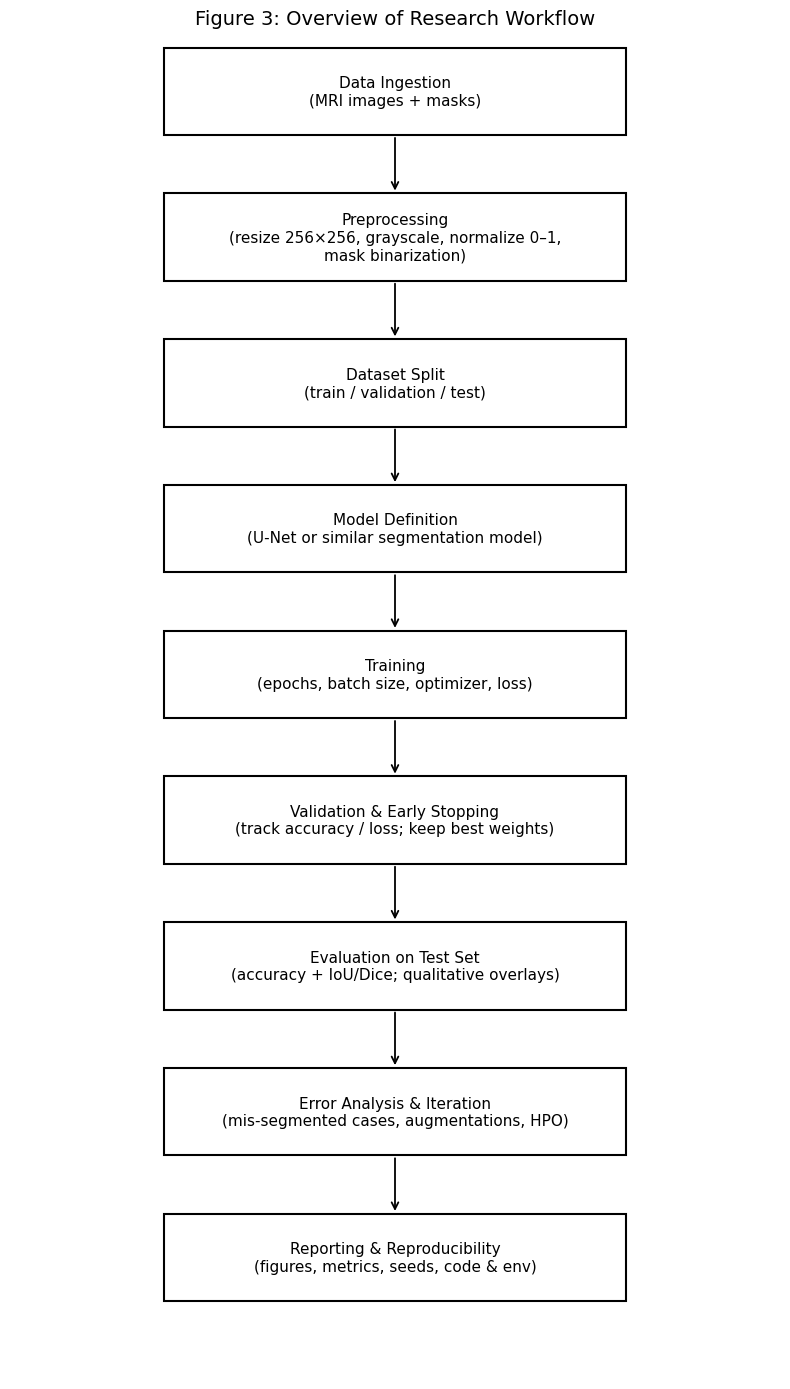

Saved: figure_03_research_workflow.png and figure_03_research_workflow.pdf


In [51]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

# --- configure title and steps here ---
title = "Figure 3: Overview of Research Workflow"
steps = [
    "Data Ingestion\n(MRI images + masks)",
    "Preprocessing\n(resize 256×256, grayscale, normalize 0–1,\nmask binarization)",
    "Dataset Split\n(train / validation / test)",
    "Model Definition\n(U-Net or similar segmentation model)",
    "Training\n(epochs, batch size, optimizer, loss)",
    "Validation & Early Stopping\n(track accuracy / loss; keep best weights)",
    "Evaluation on Test Set\n(accuracy + IoU/Dice; qualitative overlays)",
    "Error Analysis & Iteration\n(mis-segmented cases, augmentations, HPO)",
    "Reporting & Reproducibility\n(figures, metrics, seeds, code & env)"
]

# --- drawing helpers ---
def add_box(ax, x, y, w, h, text):
    rect = Rectangle((x, y), w, h, fill=False, linewidth=1.5)
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, text, ha='center', va='center', fontsize=11, wrap=True)

def add_down_arrow(ax, x, y, w, h, y_to):
    start = (x + w/2, y)
    end   = (x + w/2, y_to)
    arrow = FancyArrowPatch(start, end, arrowstyle='->', mutation_scale=12, linewidth=1.3)
    ax.add_patch(arrow)

# --- canvas ---
fig, ax = plt.subplots(figsize=(8, 14))
ax.set_xlim(0, 10)
ax.set_ylim(0, 14)
ax.axis('off')

# layout
x = 2.0
w, h = 6.0, 0.9
y_start = 12.8
gap = 0.6

# draw boxes & arrows
y = y_start
for i, s in enumerate(steps):
    add_box(ax, x, y, w, h, s)
    if i < len(steps) - 1:
        y_next = y - (h + gap)
        add_down_arrow(ax, x, y, w, h, y_next + h)
        y = y_next

# title and export
ax.text(5, 14, title, ha='center', va='center', fontsize=14)
plt.tight_layout()
plt.savefig("figure_03_research_workflow.png", dpi=100, bbox_inches="tight")
plt.savefig("figure_03_research_workflow.pdf", bbox_inches="tight")
plt.show()

print("Saved: figure_03_research_workflow.png and figure_03_research_workflow.pdf")




Figure 4: Dataset download and extraction output in Colab.



In [3]:
!pip install kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"your_username","key":"your_api_key"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation -p /content/seg_data
!unzip /content/seg_data/lgg-mri-segmentation.zip -d /content/seg_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/seg_data/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_9_mask.tif  
  inflating: /content/seg_data/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif  
  inflating: /content/seg_data/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10.tif  
  inflating: /content/seg_data/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10_mask.tif  
  inflating: /content/seg_data/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11.tif  
  inflating: /content/seg_data/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11_mask.tif  
  inflating: /content/seg_data/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12.tif  
  inflating: /content/seg_data/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12_mask.tif  
  inflating

In [6]:
from pathlib import Path

data_dir = Path("/content/seg_data/kaggle_3m")  # adjust if needed

print("Base exists:", data_dir.exists())
if data_dir.exists():
    patients = [p for p in sorted(data_dir.iterdir()) if p.is_dir()]
    print(f"Found {len(patients)} patient folders. Examples:", [p.name for p in patients[:5]])

    def find_first_dir(p, candidates):
        for name in candidates:
            d = p / name
            if d.is_dir():
                return d
        return None

    missing = []
    for p in patients:
        img_dir = find_first_dir(p, ["images", "image", "imgs", "img"])
        msk_dir = find_first_dir(p, ["masks", "mask", "labels", "label", "annotations"])
        if img_dir is None or msk_dir is None:
            missing.append((p.name, bool(img_dir), bool(msk_dir)))
    if missing:
        print("\nPatients with missing dirs (has_images, has_masks):")
        for name, has_img, has_msk in missing[:25]:
            print(f"  {name}: images={has_img}, masks={has_msk}")
        print(f"... ({len(missing)} total)")


Base exists: True
Found 110 patient folders. Examples: ['TCGA_CS_4941_19960909', 'TCGA_CS_4942_19970222', 'TCGA_CS_4943_20000902', 'TCGA_CS_4944_20010208', 'TCGA_CS_5393_19990606']

Patients with missing dirs (has_images, has_masks):
  TCGA_CS_4941_19960909: images=False, masks=False
  TCGA_CS_4942_19970222: images=False, masks=False
  TCGA_CS_4943_20000902: images=False, masks=False
  TCGA_CS_4944_20010208: images=False, masks=False
  TCGA_CS_5393_19990606: images=False, masks=False
  TCGA_CS_5395_19981004: images=False, masks=False
  TCGA_CS_5396_20010302: images=False, masks=False
  TCGA_CS_5397_20010315: images=False, masks=False
  TCGA_CS_6186_20000601: images=False, masks=False
  TCGA_CS_6188_20010812: images=False, masks=False
  TCGA_CS_6290_20000917: images=False, masks=False
  TCGA_CS_6665_20010817: images=False, masks=False
  TCGA_CS_6666_20011109: images=False, masks=False
  TCGA_CS_6667_20011105: images=False, masks=False
  TCGA_CS_6668_20011025: images=False, masks=False
 

In [7]:
from pathlib import Path
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

data_dir = Path("/content/seg_data/kaggle_3m")  # adjust if needed

def find_first_dir(p, candidates):
    for name in candidates:
        d = p / name
        if d.is_dir():
            return d
    return None

patients = [p for p in sorted(data_dir.iterdir()) if p.is_dir()]
X, Y = [], []
skipped_patients = 0
unpaired_files = 0

for p in patients:
    img_dir = find_first_dir(p, ["images", "image", "imgs", "img"])
    msk_dir = find_first_dir(p, ["masks", "mask", "labels", "label", "annotations"])

    if img_dir is None or msk_dir is None:
        skipped_patients += 1
        continue

    for img_path in sorted(img_dir.glob("*")):
        if not img_path.is_file():
            continue
        # try same filename first
        mask_path = msk_dir / img_path.name
        if not mask_path.exists():
            # fallback: match by stem with any extension
            matches = list(msk_dir.glob(img_path.stem + ".*"))
            if not matches:
                unpaired_files += 1
                continue
            mask_path = matches[0]

        image = load_img(img_path, color_mode="grayscale", target_size=(256, 256))
        mask  = load_img(mask_path, color_mode="grayscale", target_size=(256, 256))
        X.append(np.array(image))
        Y.append(np.array(mask))

X = np.array(X)
Y = np.array(Y)
print(f"Loaded {len(X)} image/mask pairs. Skipped patients: {skipped_patients}. Unpaired files: {unpaired_files}.")


Loaded 0 image/mask pairs. Skipped patients: 110. Unpaired files: 0.


In [8]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = Path("/content/drive/MyDrive/seg_data/kaggle_3m")  # example


Mounted at /content/drive


In [10]:
from pathlib import Path

# 0) (Colab) Mount Drive if available
try:
    from google.colab import drive
    drive.mount('/content/drive')  # no-op if already mounted
except Exception as e:
    print("Drive mount skipped:", e)

# 1) Try to resolve the dataset path automatically
def resolve_data_dir():
    # Common candidates
    candidates = [
        Path("/content/seg_data/kaggle_3m"),
        Path("/content/drive/MyDrive/seg_data/kaggle_3m"),
        Path("/content/drive/MyDrive/kaggle_3m"),
        Path("/content/kaggle_3m"),
    ]
    for p in candidates:
        if p.exists():
            return p

    # If not found, search under typical roots
    roots = [Path("/content"), Path("/content/drive/MyDrive")]
    hits = []
    for root in roots:
        if not root.exists():
            continue
        # find dirs literally named 'kaggle_3m'
        hits += list(root.glob("**/kaggle_3m"))
        if hits:
            break
    if hits:
        return hits[0]

    # Show some context to help you eyeball the location
    print("Could not auto-detect 'kaggle_3m'. Here are top-level directories:")
    for root in roots:
        if root.exists():
            print(f"\nUnder {root}:")
            for d in sorted([x for x in root.iterdir() if x.is_dir()])[:30]:
                print("  ", d)
    return None

data_dir = resolve_data_dir()
if data_dir is None or not data_dir.exists():
    raise FileNotFoundError("Could not locate the 'kaggle_3m' folder. Adjust the path or move/extract the dataset.")

print("Using data_dir:", data_dir)

# 2) SAFELY do the renames (only if the folders exist, and target doesn't)
renamed = []
for p in [d for d in data_dir.iterdir() if d.is_dir()]:
    src_img = p / "image"
    dst_img = p / "images"
    if src_img.is_dir() and not dst_img.exists():
        src_img.rename(dst_img)
        renamed.append(f"{p.name}: image -> images")

    src_lbl = p / "labels"
    dst_lbl = p / "masks"
    if src_lbl.is_dir() and not dst_lbl.exists():
        src_lbl.rename(dst_lbl)
        renamed.append(f"{p.name}: labels -> masks")

print("Renames done:", len(renamed))
if renamed:
    print("\nExamples:")
    print("\n".join(renamed[:10]))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using data_dir: /content/seg_data/kaggle_3m
Renames done: 0


📸 Figure 5:  U-Net model summary output.

In [19]:
from tensorflow.keras import layers, models

def unet_model(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)
    c1 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2,2))(c1)

    c2 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2,2))(c2)

    c3 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2,2))(c3)

    b = layers.Conv2D(128, (3,3), activation='relu', padding='same')(p3)
    b = layers.Conv2D(128, (3,3), activation='relu', padding='same')(b)

    u3 = layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(b)
    u3 = layers.concatenate([u3, c3])
    c6 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(u3)
    c6 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(c6)

    u2 = layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c6)
    u2 = layers.concatenate([u2, c2])
    c7 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(u2)
    c7 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(c7)

    u1 = layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c7)
    u1 = layers.concatenate([u1, c1])
    c8 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(u1)
    c8 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(c8)

    outputs = layers.Conv2D(1, (1,1), activation='sigmoid')(c8)
    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        160 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 64, 64,    │     32,832 │ conv2d_7[0][0]    │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 64,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 128)              │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 64, 64,    │     73,792 │ concatenate[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 64, 64,    │     36,928 │ conv2d_8[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 128, 128,  │      8,224 │ conv2d_9[0][0]  

 Total params: 481,745 (1.84 MB)

 Trainable params: 481,745 (1.84 MB)

 Non-trainable params: 0 (0.00 B)


```



In [31]:
# What do we actually have in memory?
for name in ("X","y","X_train","y_train","X_test","y_test","model"):
    obj = globals().get(name, None)
    print(f"{name:8} ->", "OK" if obj is not None else "MISSING",
          (getattr(obj, "shape", None) if obj is not None else ""))


X        -> OK (0,)
y        -> MISSING 
X_train  -> MISSING 
y_train  -> MISSING 
X_test   -> MISSING 
y_test   -> MISSING 
model    -> OK None


In [35]:
from pathlib import Path
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

def load_pairs(data_dir, target_size=(256,256)):
    data_dir = Path(data_dir)
    if not data_dir.exists():
        raise FileNotFoundError(f"Base folder not found: {data_dir}")

    valid_exts = {".png",".jpg",".jpeg",".tif",".tiff",".bmp"}

    images, masks = [], []
    unpaired = skipped = 0

    for patient_dir in sorted([p for p in data_dir.iterdir() if p.is_dir()]):
        # Image and mask files are directly in the patient directory
        img_files = sorted([f for f in patient_dir.iterdir() if f.is_file() and f.suffix.lower() in valid_exts and not f.stem.endswith('_mask')])
        mask_files = sorted([f for f in patient_dir.iterdir() if f.is_file() and f.suffix.lower() in valid_exts and f.stem.endswith('_mask')])

        if not img_files or not mask_files:
            skipped += 1
            continue

        # Create a dictionary for mask files for easy lookup by stem
        mask_dict = {m.stem[:-5]: m for m in mask_files} # Remove '_mask' suffix from stem

        for img_path in img_files:
            mask_path = mask_dict.get(img_path.stem)
            if mask_path is None:
                unpaired += 1
                continue

            im  = img_to_array(load_img(img_path, color_mode="grayscale", target_size=target_size)) / 255.0
            msk = img_to_array(load_img(mask_path, color_mode="grayscale", target_size=target_size)) / 255.0
            msk = (msk >= 0.5).astype(np.float32)

            images.append(im)
            masks.append(msk)

    X = np.stack(images).astype(np.float32) if images else np.empty((0, *target_size, 1), np.float32)
    y = np.stack(masks).astype(np.float32)  if masks  else np.empty((0, *target_size, 1), np.float32)

    print(f"Loaded {len(X)} pairs from {data_dir}. Skipped patients: {skipped}. Unpaired files: {unpaired}.")
    return X, y

# Load the data using the corrected function
X, y = load_pairs(data_dir)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Loaded 3929 pairs from /content/seg_data/kaggle_3m. Skipped patients: 0. Unpaired files: 0.
X_train shape: (3143, 256, 256, 1)
y_train shape: (3143, 256, 256, 1)
X_test shape: (786, 256, 256, 1)
y_test shape: (786, 256, 256, 1)


📸 Figure 6 : Screenshot – Accuracy vs. Epochs graph and final test accuracy.

Epoch 1/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 64s 115ms/step - accuracy: 0.9893 - loss: 0.1088 - val_accuracy: 0.9906 - val_loss: 0.0386
Epoch 2/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.9889 - loss: 0.0394 - val_accuracy: 0.9906 - val_loss: 0.0334
Epoch 3/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9892 - loss: 0.0378 - val_accuracy: 0.9906 - val_loss: 0.0331
Epoch 4/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9894 - loss: 0.0365 - val_accuracy: 0.9906 - val_loss: 0.0311
Epoch 5/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.9909 - loss: 0.0314 - val_accuracy: 0.9904 - val_loss: 0.0317
Epoch 6/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.9905 - loss: 0.0330 - val_accuracy: 0.9910 - val_loss: 0.0309
Epoch 7/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.9905 - loss: 0.0322 - val_accuracy: 0.9923 - val_loss: 0.0269
Epoch 8/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.9916 - loss: 0.0283 -

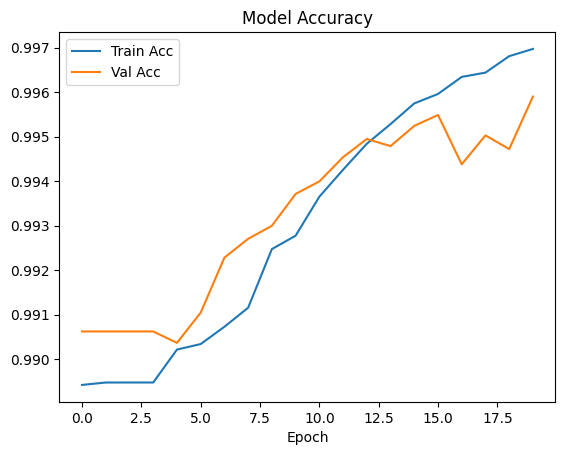

Test metrics: {'loss': 0.01180229615420103, 'compile_metrics': 0.9959020018577576}


In [36]:
# Guards so you don't hit NameError again
missing = [n for n in ("X_train","y_train","X_test","y_test") if n not in globals()]
if missing:
    raise RuntimeError(f"Missing variables: {missing}. Re-run the loader cell above.")

# Make sure model exists & compiled
try:
    _ = model.optimizer
except Exception:
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["binary_accuracy"])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),   # better than validation_split here
    batch_size=8, epochs=20, shuffle=True, verbose=1
)

# Plot whatever accuracy key you actually have
hist = history.history
print("History keys:", list(hist.keys()))
acc_key = next((k for k in ("accuracy","binary_accuracy") if k in hist), None)
val_acc_key = f"val_{acc_key}" if acc_key and f"val_{acc_key}" in hist else None

import matplotlib.pyplot as plt
plt.figure()
if acc_key:     plt.plot(hist[acc_key], label="Train Acc")
if val_acc_key: plt.plot(hist[val_acc_key], label="Val Acc")
plt.legend(); plt.title("Model Accuracy"); plt.xlabel("Epoch"); plt.show()

results = model.evaluate(X_test, y_test, verbose=0)
print("Test metrics:", dict(zip(model.metrics_names, results)))

Figure 7 : Screenshot – Example segmentation output visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


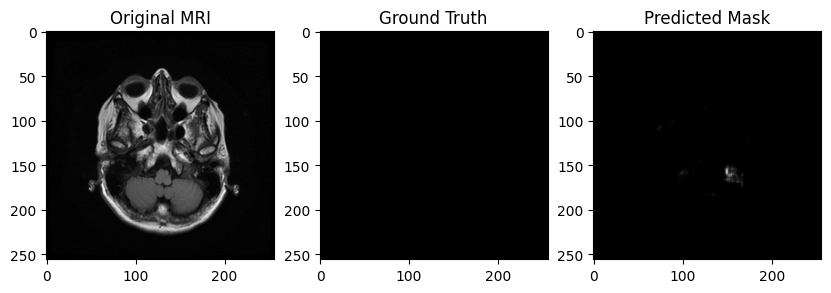

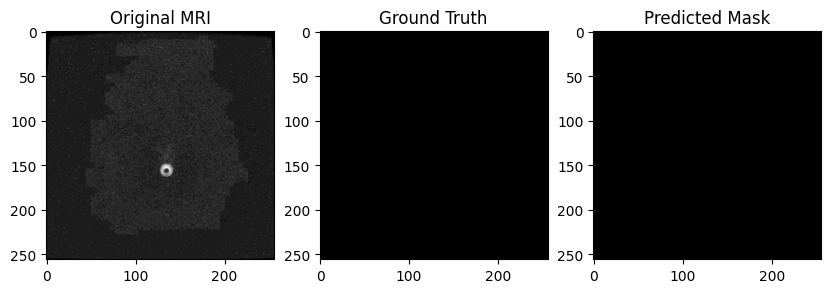

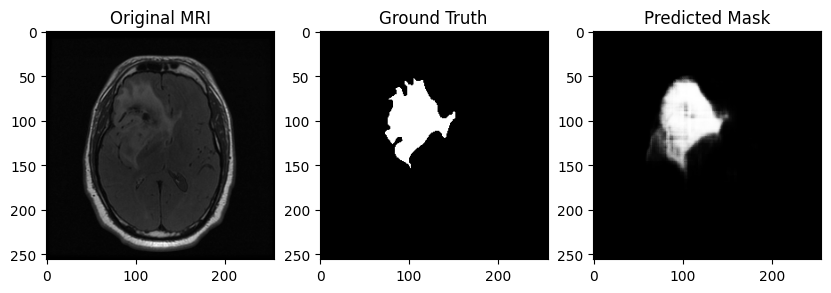

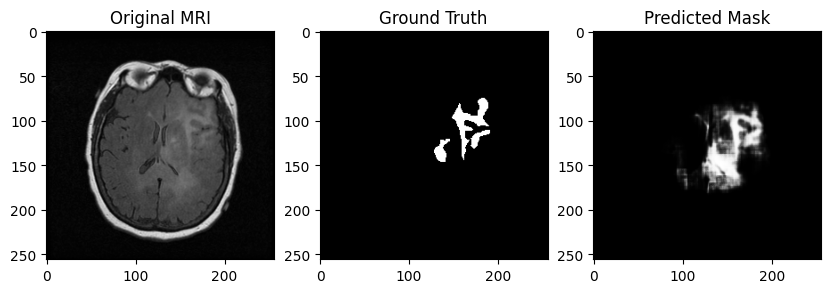

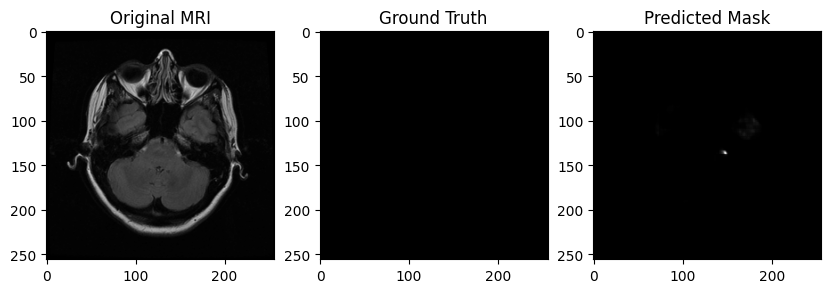

In [55]:
predictions = model.predict(X_test[:5])
for i in range(5):
    plt.figure(figsize=(10,3))
    plt.subplot(1,3,1)
    plt.imshow(X_test[i].reshape(256,256), cmap='gray')
    plt.title("Original MRI")
    plt.subplot(1,3,2)
    plt.imshow(y_test[i].reshape(256,256), cmap='gray')
    plt.title("Ground Truth")
    plt.subplot(1,3,3)
    plt.imshow(predictions[i].reshape(256,256), cmap='gray')
    plt.title("Predicted Mask")
    plt.show()
